In [104]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Softmax

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import confusion_matrix

# EDA

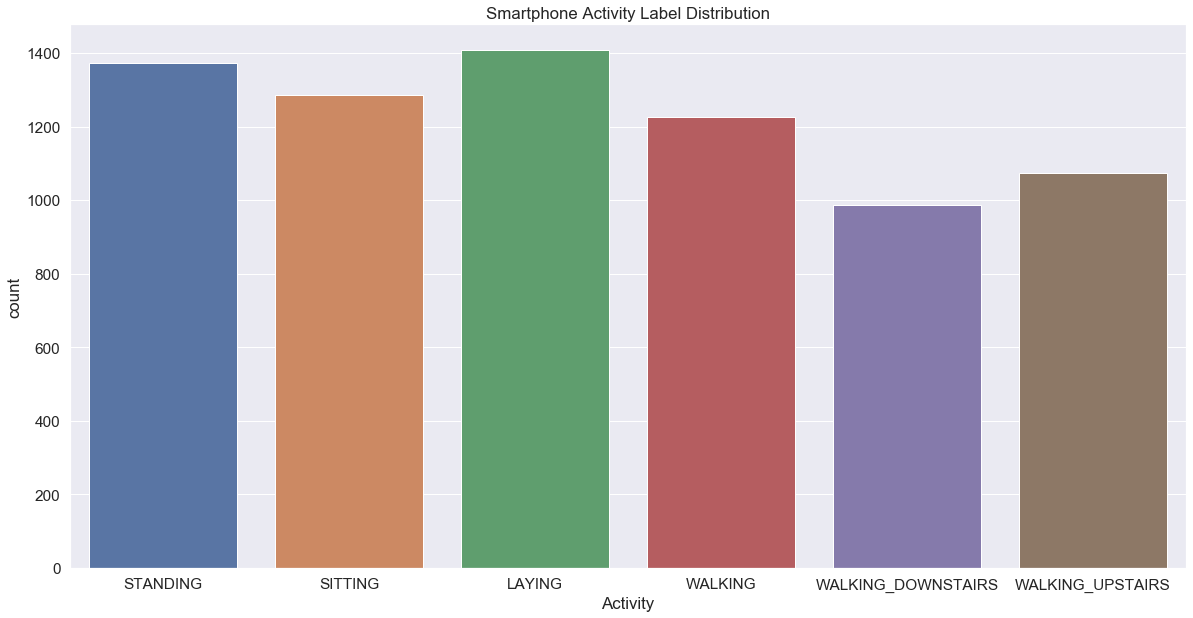

In [130]:
import seaborn as sns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

X_test = train.Activity
plt.figure(figsize=(20,10))
plt.title("Smartphone Activity Label Distribution")
sns.countplot(train['Activity'], data=train)
#X_train = train.drop(['Activity','subject'], axis=1)

y_test = test.Activity
#y_train = test.drop(['Activity','subject'], axis=1) 



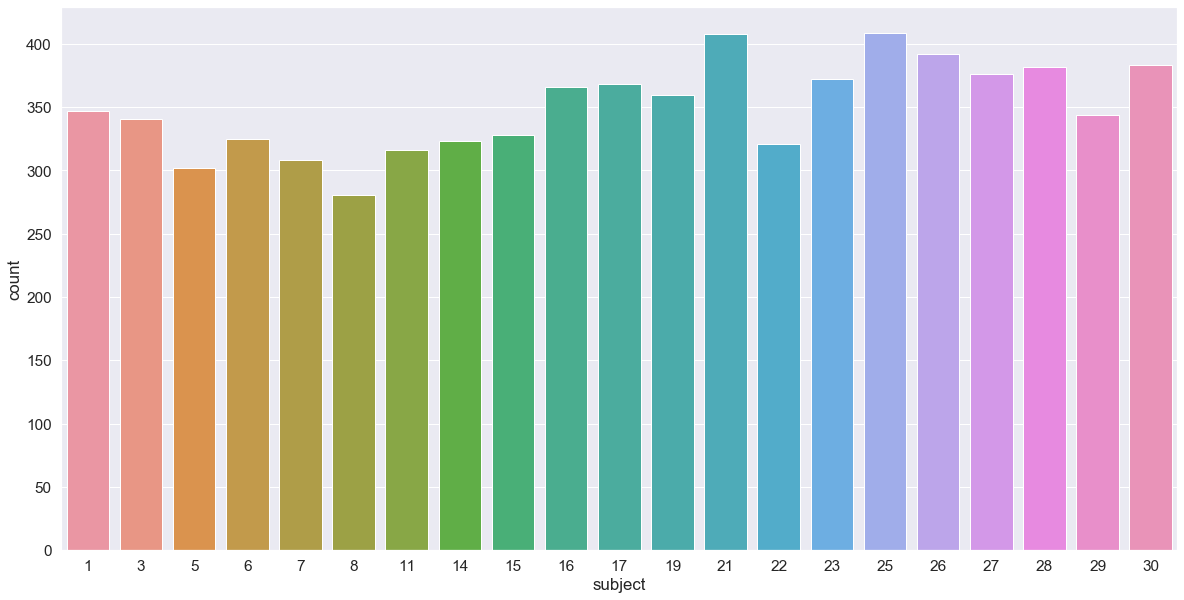

In [132]:
plt.figure(figsize=(20,10))
sns.countplot(train['subject'], data=train)

In [133]:
train.head(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,STANDING
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,STANDING
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,STANDING
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,STANDING
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,STANDING


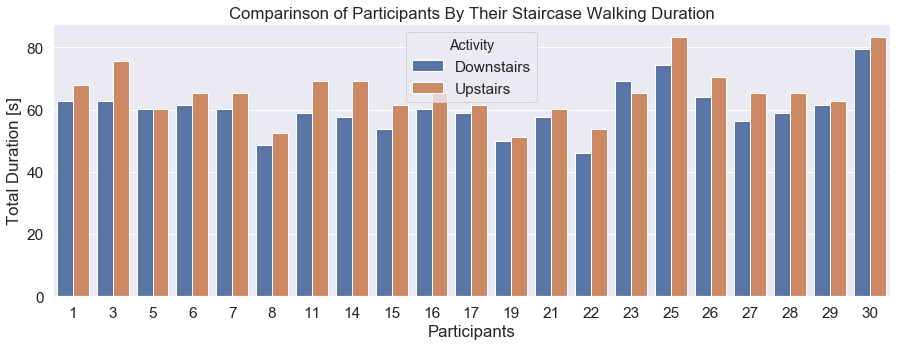

In [141]:
# label = train.pop('Activity')
z= label.isin(['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'])
duration = (train[z].groupby([label[z], 'subject'])['tBodyAcc-mean()-X'].count() * 1.28)

# Create plot
plot_data = duration.reset_index()
plot_data['Activity'] = plot_data['Activity'].map({'WALKING_UPSTAIRS':'Upstairs', 'WALKING_DOWNSTAIRS':'Downstairs'})

plt.figure(figsize=(15,5))
sns.barplot(data=plot_data, x='subject', y='tBodyAcc-mean()-X', hue='Activity')
plt.title('Comparinson of Participants By Their Staircase Walking Duration')
plt.xlabel('Participants')
plt.ylabel('Total Duration [s]')
plt.show()




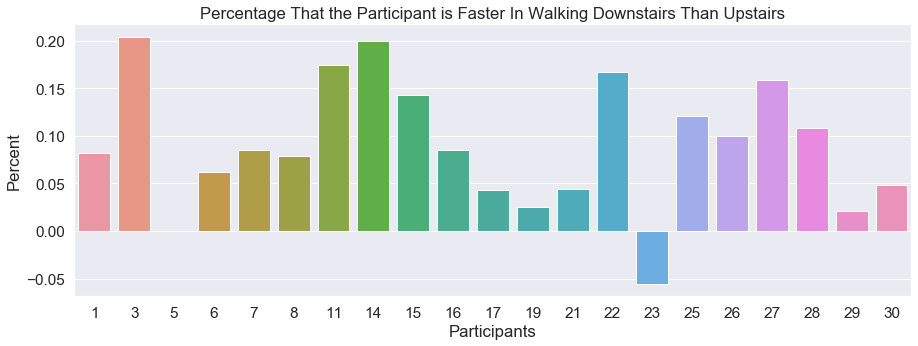

In [142]:
# Create data and plot
plt.figure(figsize=(15,5))
plot_data = ((duration.loc['WALKING_UPSTAIRS'] / duration.loc['WALKING_DOWNSTAIRS']) -1).sort_values(ascending=False)
sns.barplot(x=plot_data.index, y=plot_data)
plt.title('Percentage That the Participant is Faster In Walking Downstairs Than Upstairs')
plt.xlabel('Participants')
plt.ylabel('Percent')
plt.show()

In [105]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

X_test = train.Activity
X_train = train.drop(['Activity','subject'], axis=1)

y_test = test.Activity
y_train = test.drop(['Activity','subject'], axis=1) 

X_train.shape


(7352, 561)

In [106]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
y_test = lb_make.fit_transform(y_test)
X_test = lb_make.fit_transform(X_test)


X_test = keras.utils.to_categorical(X_test, 6)
y_test = keras.utils.to_categorical(y_test, 6)



# ANN

In [84]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 561))

# Adding the second hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, X_test, batch_size = 10, epochs = 100)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





7352/7352 [==============================] - 2s 292us/step - loss: 0.3338 - acc: 0.8476
Epoch 2/100
7352/7352 [==============================] - 2s 210us/step - loss: 0.1574 - acc: 0.9264
Epoch 3/100
7352/7352 [==============================] - 2s 211us/step - loss: 0.1154 - acc: 0.9424
Epoch 4/100
7352/7352 [==============================] - 2s 218us/step - loss: 0.0953 - acc: 0.9497
Epoch 5/100
7352/7352 [==============================] - 2s 218us/step - loss: 0.0865 - acc: 0.9502
Epoch 6/100
7352/7352 [==============================] - 2s 231us/step - loss: 0.0786 - acc: 0.9538
Epoch 7/100
7352/7352 [==============================] - 2s 226us/step - loss: 0.0747 - acc: 0.9530
Epoch 8/100
7352/7352 [==============================] - 2s 210us/step - loss: 0.0715 - acc: 0.9537
Epoch 9/100
7352/7352 [==============================] - 2s 262us/step - loss: 0.0381 - acc: 

Fitting the CNN to the image

In [88]:
score = classifier.evaluate(y_train, y_test, verbose=1)

ann_acc = score[1]
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2947/2947 [==============================] - 0s 31us/step
Test loss: 0.08661497724558595
Test accuracy: 0.9851826725064353


# TRAIN TEST SPLIT

In [107]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

y_train = train.Activity
X_train = train.drop(['Activity','subject'], axis=1)

y_test = test.Activity
X_test = test.drop(['Activity','subject'], axis=1) 

lb_make = LabelEncoder()
y_test = lb_make.fit_transform(y_test)
y_train = lb_make.fit_transform(y_train)



# SVM RBF/POLY

In [117]:
from sklearn.svm import SVC

import matplotlib.pyplot as plt

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train,y_train)
   



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [118]:
x_svm = X_test  
y_svm = y_test

import seaborn as sn

# print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train, y_train)))
svm_rbf = svm.score(x_svm, y_svm)
print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(x_svm, y_svm)))    
predicted = svm.predict(X_test)
 
cm = confusion_matrix(y_test, predicted)

The accuracy of the svm classifier on test data is 0.95 out of 1


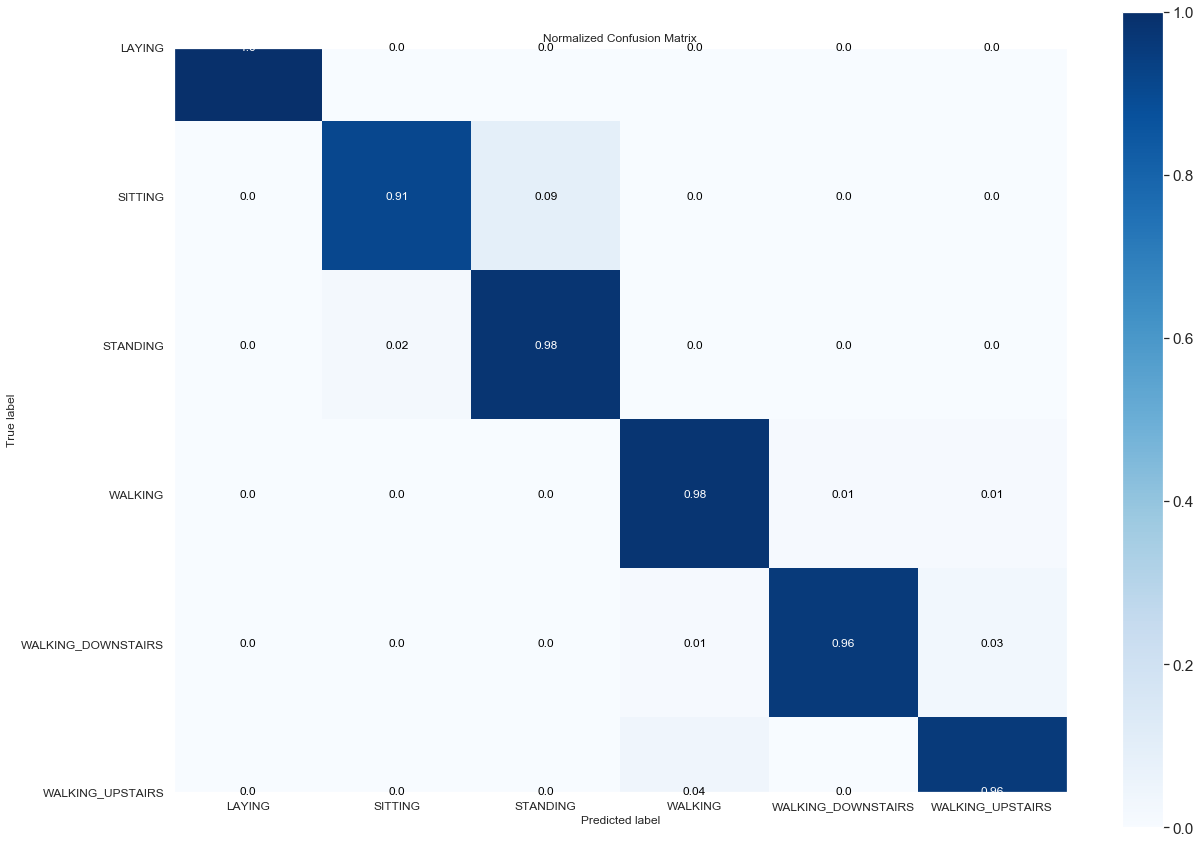

In [119]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test1, predicted1, normalize=True,figsize =(20,15),text_fontsize= "large")
plt.show()

In [120]:
from sklearn.svm import SVC

import matplotlib.pyplot as plt

svm = SVC(kernel='poly', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [121]:
x_svm = X_test  
y_svm = y_test

import seaborn as sn

# print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train, y_train)))
svm_poly = svm.score(x_svm, y_svm)
print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(x_svm, y_svm)))    
predicted = svm.predict(X_test)
 
cm = confusion_matrix(y_test, predicted)

The accuracy of the svm classifier on test data is 0.97 out of 1


In [122]:
y_test1 = lb_make.inverse_transform(y_test)
predicted1 = lb_make.inverse_transform(predicted)

predicted1

array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype=object)

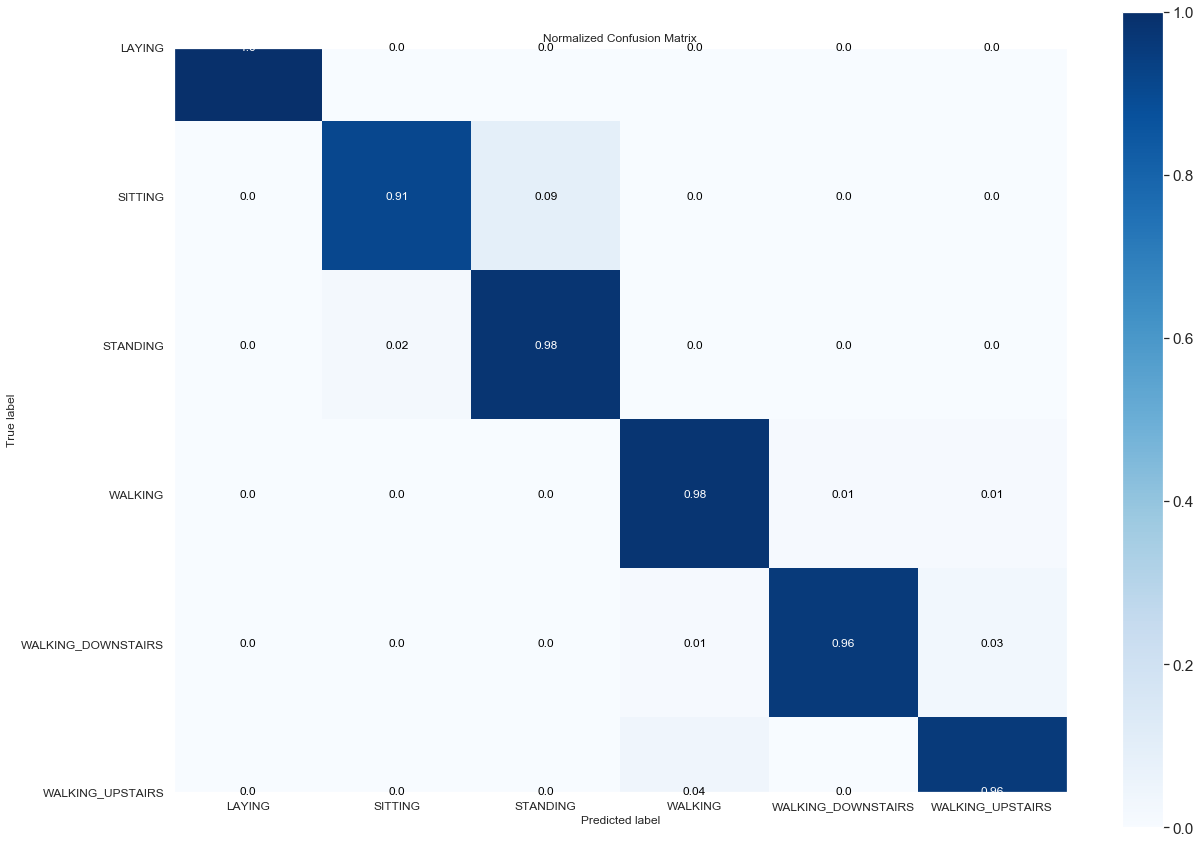

In [123]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test1, predicted1, normalize=True,figsize =(20,15),text_fontsize= "large")
plt.show()

# KNN 

In [124]:
#preprocessing recommandation system
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)
 
#KNN
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

#prediction
y_pred1 = classifier.predict(X_test) 

acc_knn = metrics.accuracy_score(y_test, y_pred1)

print("Accuracy of KNN for k= 5 :",acc_knn)


classifier = KNeighborsClassifier(n_neighbors=10)  
classifier.fit(X_train, y_train)

#prediction
y_pred = classifier.predict(X_test) 

acc_knn = metrics.accuracy_score(y_test, y_pred)

print("Accuracy of KNN for k= 10 :",acc_knn)

classifier = KNeighborsClassifier(n_neighbors=25)  
classifier.fit(X_train, y_train)

#prediction
y_pred = classifier.predict(X_test) 

acc_knn = metrics.accuracy_score(y_test, y_pred)

print("Accuracy of KNN for k= 25 :",acc_knn)

classifier = KNeighborsClassifier(n_neighbors=100)  
classifier.fit(X_train, y_train)

#prediction
y_pred = classifier.predict(X_test) 

acc_knn = metrics.accuracy_score(y_test, y_pred)

print("Accuracy of KNN for k= 100 :",acc_knn)



from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred1))  
print(classification_report(y_test, y_pred1))  



Accuracy of KNN for k= 5 : 0.9002375296912114
Accuracy of KNN for k= 10 : 0.9066847641669494
Accuracy of KNN for k= 25 : 0.9046487953851374
Accuracy of KNN for k= 100 : 0.8859857482185273
[[534   2   1   0   0   0]
 [  0 389 100   0   0   2]
 [  0  37 495   0   0   0]
 [  0   0   0 485  10   1]
 [  0   0   0  45 331  44]
 [  0   0   0  40  12 419]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       537
           1       0.91      0.79      0.85       491
           2       0.83      0.93      0.88       532
           3       0.85      0.98      0.91       496
           4       0.94      0.79      0.86       420
           5       0.90      0.89      0.89       471

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.90      0.90      2947



# NAIVE BAYES

Accuracy: 0.7702748557855447


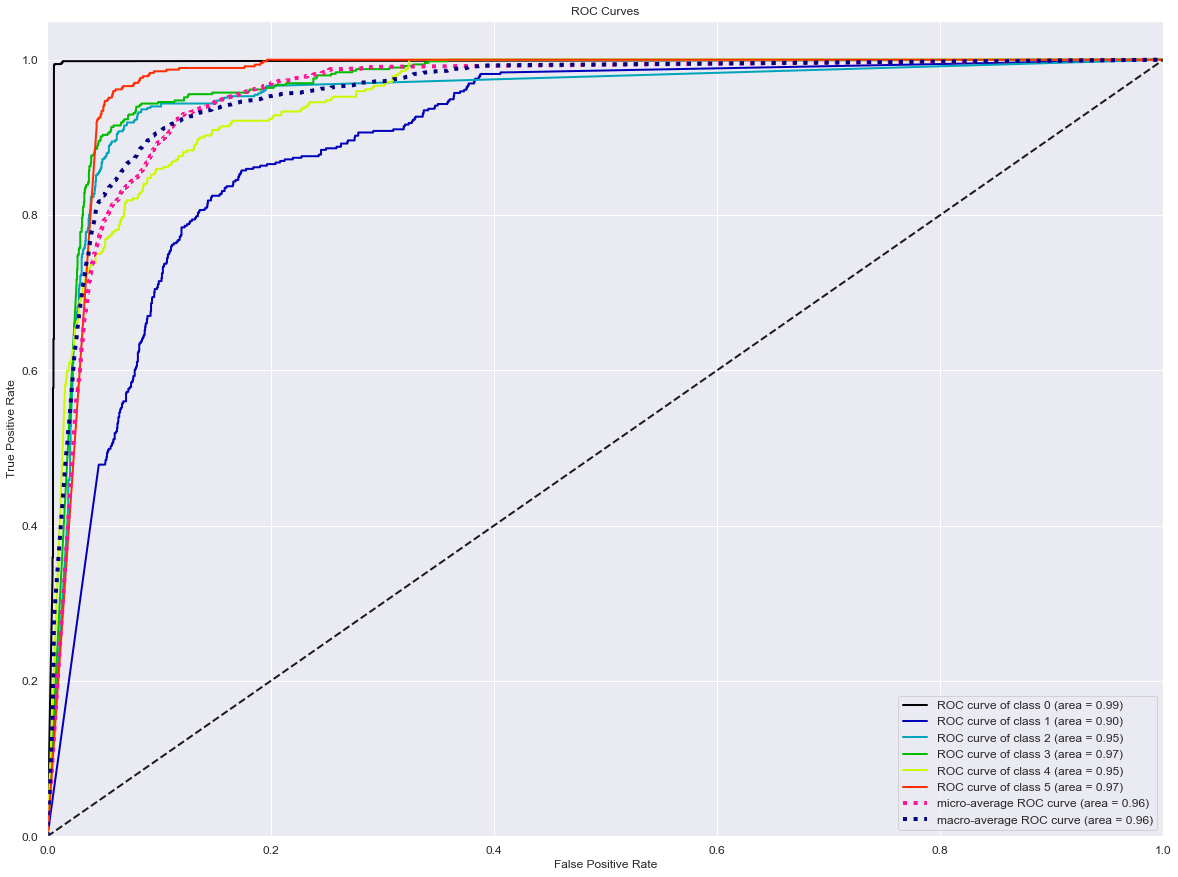

In [125]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

naive_acc= metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


y_probas = gnb.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas,figsize =(20,15),text_fontsize= "large")


# DECISION TREE

Accuracy of decision tree is : 0.8476416694944011


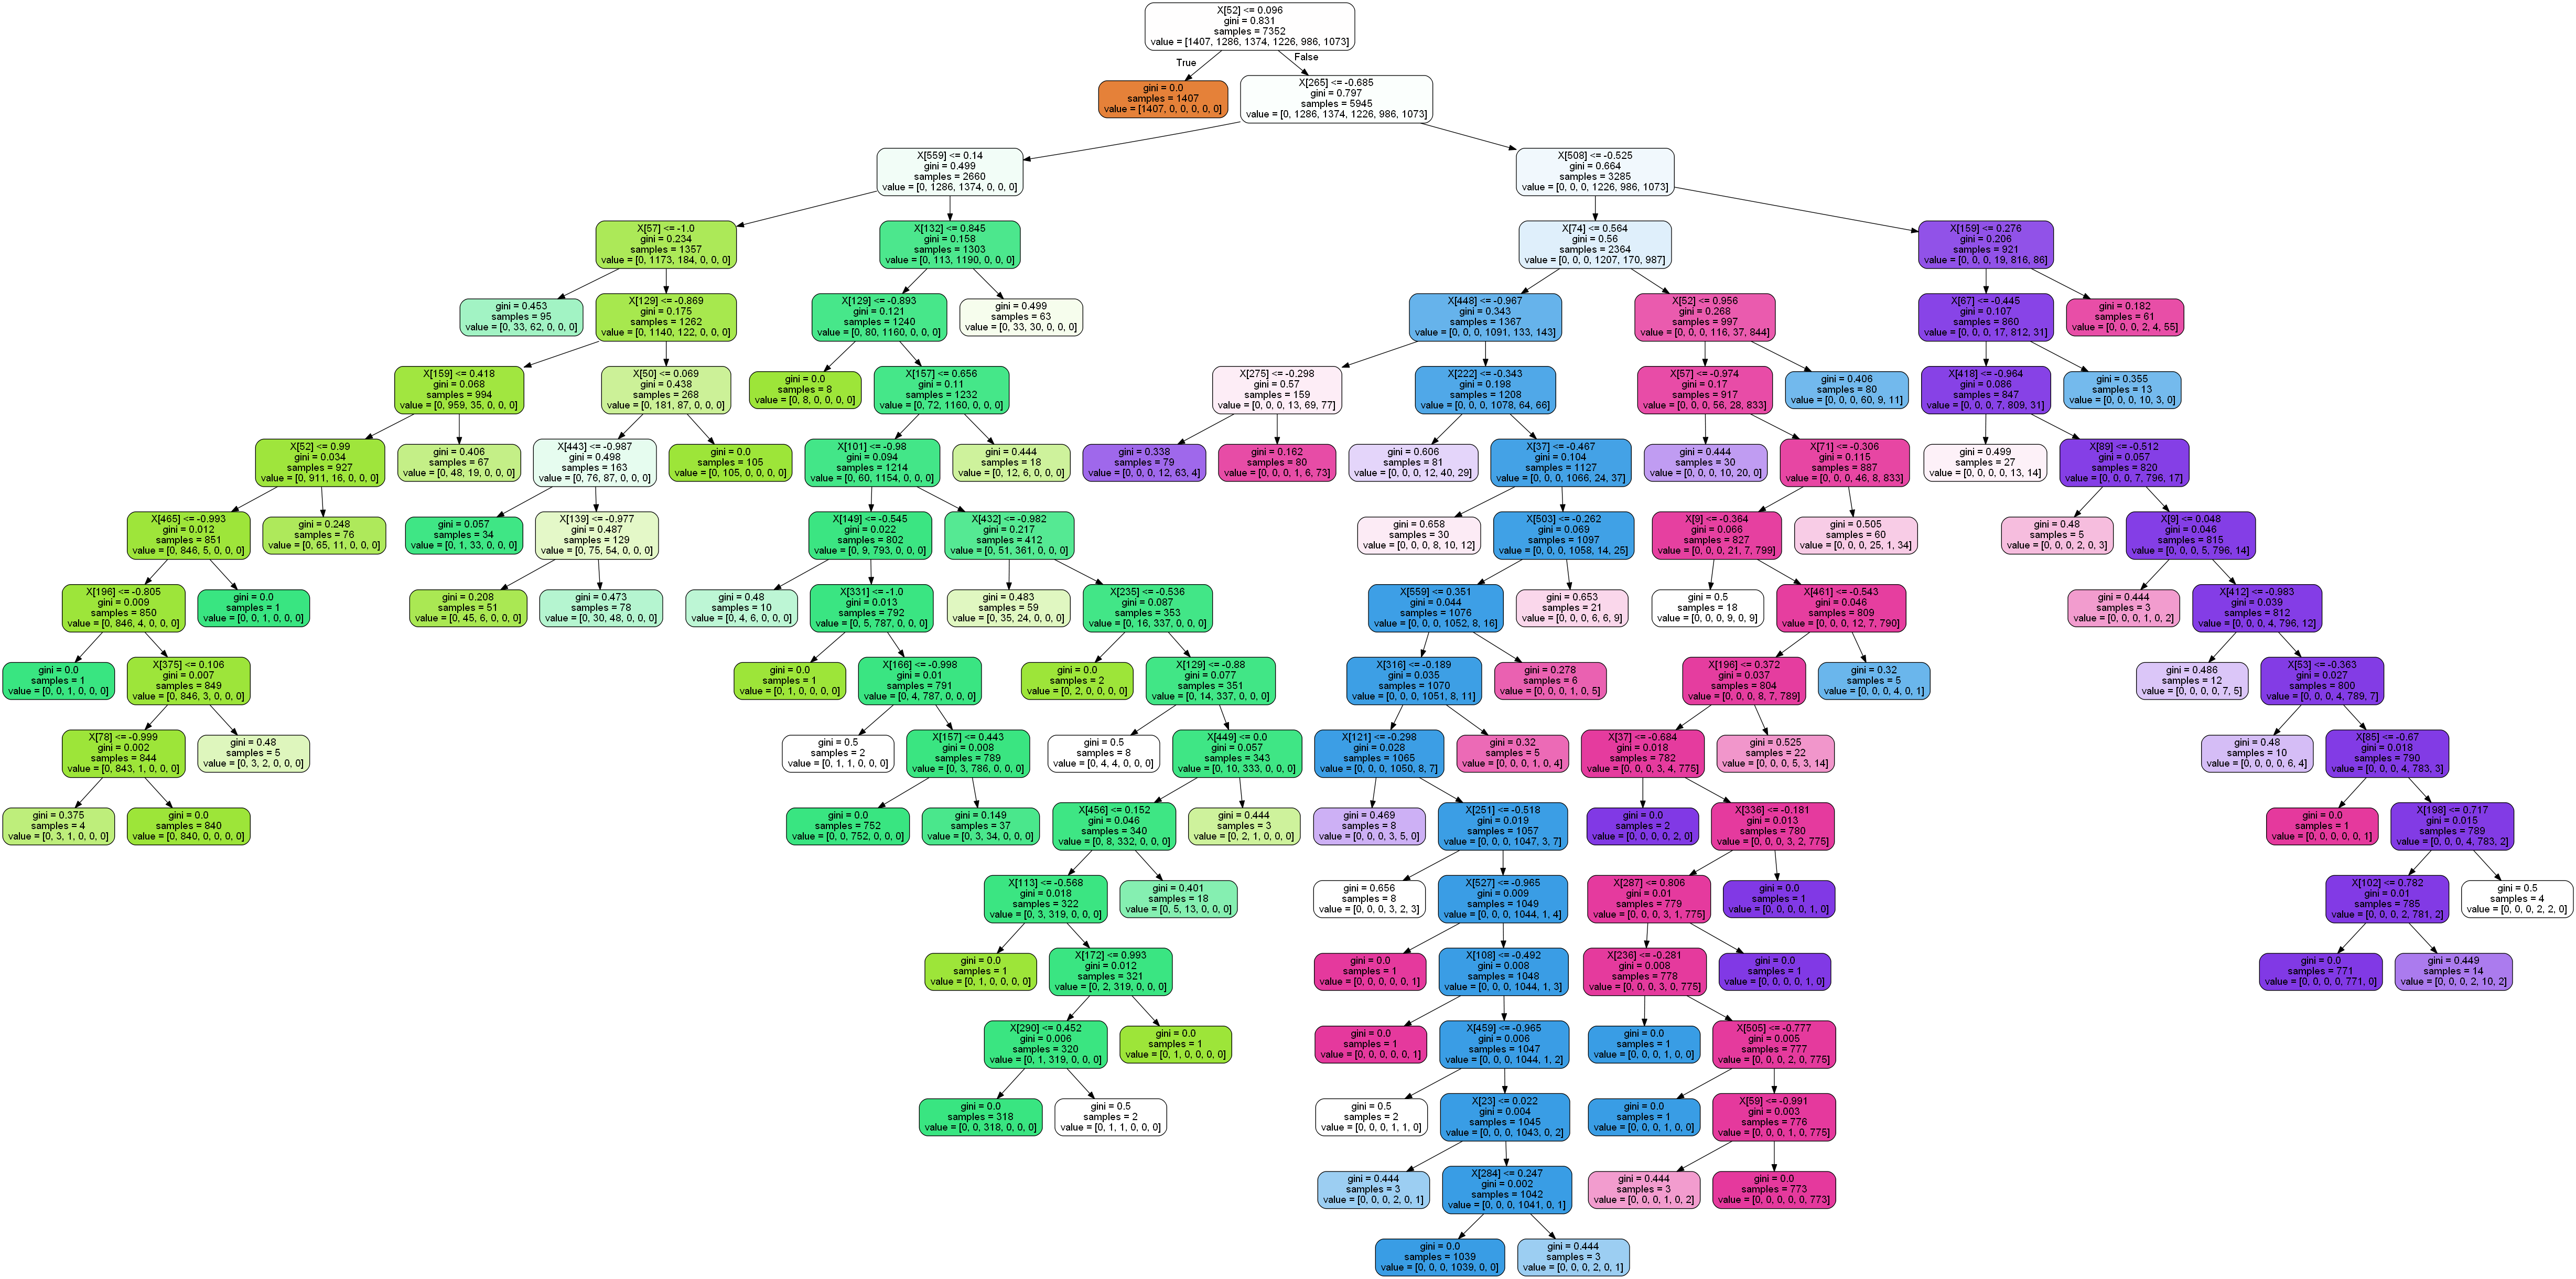

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import io


clf = DecisionTreeClassifier(min_samples_split = 100)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

acc_train = np.sum(clf.predict(X_train) == y_train )/ float(y_train.size)

acc_test = np.sum(clf.predict(X_test) == y_test )/ float(y_test.size)

acc_decistion = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of decision tree is :", acc_decistion)


# Plot decision tree


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decision_tree.png')
Image(graph.create_png())

# MODEL COMPARISION

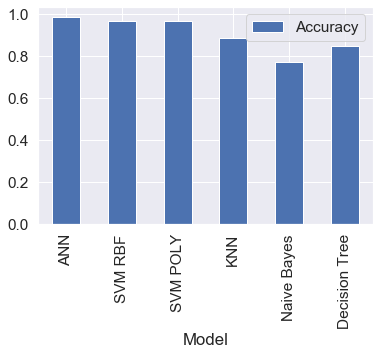

In [127]:
d = {'Model':['ANN','SVM RBF','SVM POLY','KNN','Naive Bayes','Decision Tree'],'Accuracy':[score[1],svm_poly,svm_poly,acc_knn,naive_acc,acc_decistion]}

agg_scores = pd.DataFrame(data = d)
agg_scores.plot(x='Model',y='Accuracy',kind='bar')